### Using all 8 stations with a P record from 2005-2016: 
### Fisera Ridge, Upper Clearing, Hay Meadow
### Kananaskis, Bow Valley, Kananaskis Pocaterra, Banff CS, Wildcat Hills
### Remove days with P<1mm
## Explore effects of changing gamma distribution params: alpha (shape) and beta (scale)

In [1]:
import numpy as np
import pandas as pd
import math
from scipy import stats
from sklearn.linear_model import LinearRegression
import scipy
# import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

### Read in precip data for all stations

### Fisera Ridge 2325 m, Upper Clearing 1845 m, Hay Meadow 1436 m

In [2]:
# Use pd.read_csv to read csv file
# Fisera Ridge
FRP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\FRdailyprecip.csv", 
                            header=None, names= ["date", "FR_p_mm"])
FRP_df.set_index("date", inplace=True)

# Upper Clearing
UCP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\UCdailyprecip.csv", 
                            header=None, names= ["date", "UC_p_mm"])
UCP_df.set_index("date", inplace=True)

# Hay Meadow
HMP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\HMdailyprecip.csv", 
                            header=None, names= ["date", "HM_p_mm"])
HMP_df.set_index("date", inplace=True)

# drop P values less than 1.0mm
FRP_df = FRP_df.drop(FRP_df[FRP_df.FR_p_mm < 1.0].index)
UCP_df = UCP_df.drop(UCP_df[UCP_df.UC_p_mm < 1.0].index)
HMP_df = HMP_df.drop(HMP_df[HMP_df.HM_p_mm < 1.0].index)

### Kananaskis 1391.1 m

In [3]:
# Use pd.read_csv to read csv file
KP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Kananaskis\en_climate_daily_AB_3053600_2005-2016_P1D.csv", 
                               header=[0])
KP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'K_p_mm'}, inplace=True) # rename date column
KP_df.set_index("date", inplace=True)
# change datetime format to YMD
KP_df.index = pd.to_datetime(KP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
KP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
KP_df["K_p_mm"] = KP_df["K_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
KP_df.drop(KP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
KP_df.drop(KP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
KP_df = KP_df.drop(KP_df[KP_df.K_p_mm < 1.0].index)

### Bow Valley 1297.5 m

In [4]:
# Use pd.read_csv to read csv file
BVP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Bow_Valley\en_climate_daily_AB_3050778_2005-2016_P1D.csv", 
                               header=[0])
BVP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'BV_p_mm'}, inplace=True) # rename date column
BVP_df.set_index("date", inplace=True)
# change datetime format to YMD
BVP_df.index = pd.to_datetime(BVP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
BVP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
BVP_df["BV_p_mm"] = BVP_df["BV_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
BVP_df.drop(BVP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# need to drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
BVP_df.drop(BVP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
BVP_df = BVP_df.drop(BVP_df[BVP_df.BV_p_mm < 1.0].index)

### Kananaskis Pocaterra 1610.0 m

In [5]:
# Use pd.read_csv to read csv file
KPP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Kananaskis_Pocaterra\en_climate_daily_AB_3053604_2005-2016_P1D.csv", 
                               header=[0])
KPP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'KP_p_mm'}, inplace=True) # rename date column
KPP_df.set_index("date", inplace=True)
# change datetime format to YMD
KPP_df.index = pd.to_datetime(KPP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
KPP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
KPP_df["KP_p_mm"] = KPP_df["KP_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
KPP_df.drop(KPP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# need to drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
KPP_df.drop(KPP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
KPP_df = KPP_df.drop(KPP_df[KPP_df.KP_p_mm < 1.0].index)

### Banff CS 1396.9 m

In [6]:
# Use pd.read_csv to read csv file
BCSP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Banff_CS\en_climate_daily_AB_3050519_2005-2016_P1D.csv", 
                               header=[0])
BCSP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'BCS_p_mm'}, inplace=True) # rename date column
BCSP_df.set_index("date", inplace=True)
# change datetime format to YMD
BCSP_df.index = pd.to_datetime(BCSP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
BCSP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
BCSP_df["BCS_p_mm"] = BCSP_df["BCS_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
BCSP_df.drop(BCSP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
BCSP_df.drop(BCSP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
BCSP_df = BCSP_df.drop(BCSP_df[BCSP_df.BCS_p_mm < 1.0].index)

### Wildcat Hills 1268.0 m

In [7]:
# Use pd.read_csv to read csv file
WHP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Wild_Cat_Hills\en_climate_daily_AB_3037550_2005-2016_P1D.csv", 
                               header=[0])
WHP_df.rename(columns={'Date/Time':'date', 'Total Precip (mm)':'WH_p_mm'}, inplace=True) # rename date column
WHP_df.set_index("date", inplace=True)
# change datetime format to YMD
WHP_df.index = pd.to_datetime(WHP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
WHP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
WHP_df["WH_p_mm"] = WHP_df["WH_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
WHP_df.drop(WHP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
WHP_df.drop(WHP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
WHP_df = WHP_df.drop(WHP_df[WHP_df.WH_p_mm < 1.0].index)

In [8]:
# check how many wet days there are at each station (from highest elev to lowest)
print("FR wet days (2325 m) =", len(FRP_df))
print("UC wet days (1845 m) =", len(UCP_df))
print("KP wet days (1610 m) =", len(KPP_df))
print("HM wet days (1436 m) =", len(HMP_df))
print("BCS wet days (1397 m) =", len(BCSP_df))
print("K wet days (1391 m) =", len(KP_df))
print("BV wet days (1298 m) =", len(BVP_df))
print("WH wet days (1268 m) =", len(WHP_df))

FR wet days (2325 m) = 1482
UC wet days (1845 m) = 1129
KP wet days (1610 m) = 653
HM wet days (1436 m) = 916
BCS wet days (1397 m) = 980
K wet days (1391 m) = 1027
BV wet days (1298 m) = 947
WH wet days (1268 m) = 919


### Plot histogram and probability distributions for wet days at each station in descending order of elevation

### Fisera Ridge 2325 m, 1482 wet days

Text(0.5, 1.0, 'Fisera Ridge 2325 m (2005-2016)')

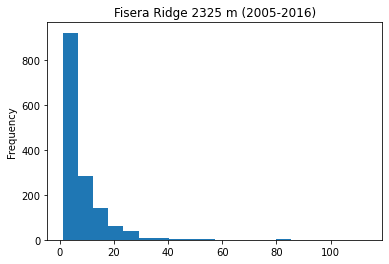

In [13]:
FRP_df.FR_p_mm.plot(kind='hist', bins=20)
plt.title('Fisera Ridge 2325 m (2005-2016)')

gamma: (0.13428659108856938, 0.9999999999999999, 2.4648480978335)
exponential: (1.0, 6.741584952766531)


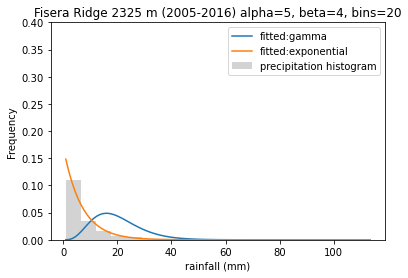

In [79]:
# fit gamma and exp distribution
x = np.linspace(1, max(FRP_df.FR_p_mm), 100)
y = FRP_df.FR_p_mm
FRP_df.FR_p_mm.plot(kind='hist', bins=20, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma distn
param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=5.0, scale=5.0) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')
# fit exponential distn
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
# set up plot features
plt.xlabel('rainfall (mm)')
# plt.xlim(0, 40)
plt.ylim(0, 0.4)
plt.legend()
plt.title('Fisera Ridge 2325 m (2005-2016) alpha=5, beta=5, bins=20')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\changing_gamma_params_plots\FR_a5_b5.png')

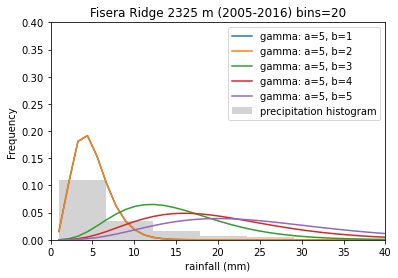

In [85]:
# fit gamma distribution with diff params and and plot them together
x = np.linspace(1, max(FRP_df.FR_p_mm), 100)
y = FRP_df.FR_p_mm
FRP_df.FR_p_mm.plot(kind='hist', bins=20, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma distn
param = scipy.stats.gamma.fit(y)
# print("gamma:", param)
pdf_fitted1 = scipy.stats.gamma.pdf(x, a=5.0, scale=1.0) # a is shape param
plt.plot(x, pdf_fitted1, label='gamma: a=5, b=1')
pdf_fitted2 = scipy.stats.gamma.pdf(x, a=5.0, scale=2.0) # a is shape param
plt.plot(x, pdf_fitted1, label='gamma: a=5, b=2')
pdf_fitted3 = scipy.stats.gamma.pdf(x, a=5.0, scale=3.0) # a is shape param
plt.plot(x, pdf_fitted3, label='gamma: a=5, b=3')
pdf_fitted4 = scipy.stats.gamma.pdf(x, a=5.0, scale=4.0) # a is shape param
plt.plot(x, pdf_fitted4, label='gamma: a=5, b=4')
pdf_fitted5 = scipy.stats.gamma.pdf(x, a=5.0, scale=5.0) # a is shape param
plt.plot(x, pdf_fitted5, label='gamma: a=5, b=5')
# set up plot features
plt.xlabel('rainfall (mm)')
plt.xlim(0, 40)
plt.ylim(0, 0.4)
plt.legend()
plt.title('Fisera Ridge 2325 m (2005-2016) bins=20')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\changing_gamma_params_plots\FR_a5_b1to5.png')

exponential: (1.0, 6.741584952766531)


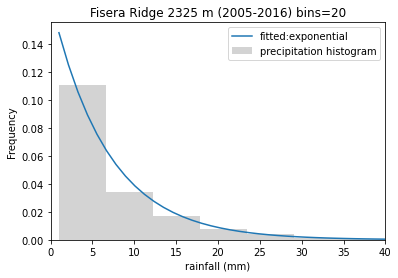

In [89]:
# fit exp distribution
x = np.linspace(1, max(FRP_df.FR_p_mm), 100)
y = FRP_df.FR_p_mm
FRP_df.FR_p_mm.plot(kind='hist', bins=20, density=True, color='lightgrey', label='precipitation histogram')
# fit exponential distn
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
# set up plot features
plt.xlabel('rainfall (mm)')
plt.xlim(0, 40)
# plt.ylim(0, 0.4)
plt.legend()
plt.title('Fisera Ridge 2325 m (2005-2016) bins=20')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\changing_gamma_params_plots\FR_expdist.png')

### Everything below is left over from Wet_day_prob_1mm_thresh_2005-16stns.ipynb

### Upper Clearing 1845 m, 1129 wet days

Text(0.5, 1.0, 'Upper Clearing 1845 m (2005-2016)')

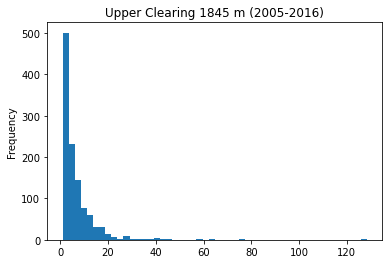

In [77]:
UCP_df.UC_p_mm.plot(kind='hist', bins=50)
plt.title('Upper Clearing 1845 m (2005-2016)')

gamma: (0.08539229677177863, 0.9999999999999998, 2.403799793260706)
exponential: (1.0, 5.513763241806909)


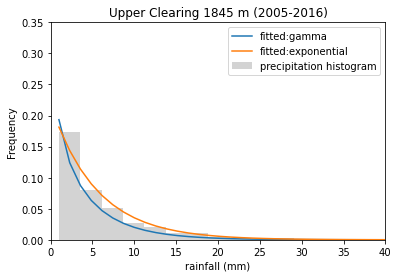

In [78]:
# fit gamma, exp and lognormal distributions
x = np.linspace(1, max(UCP_df.UC_p_mm), 100)
y = UCP_df.UC_p_mm

UCP_df.UC_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')

param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=0.76, scale=5.25) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')

param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')

# param = scipy.stats.lognorm.fit(y)
# print("lognorm:", param)
# pdf_fitted = scipy.stats.lognorm.pdf(x, param[0], param[1], param[2])
# plt.plot(x, pdf_fitted, label='fitted:lognormal')

plt.xlabel('rainfall (mm)')
plt.xlim(0, 40)
plt.ylim(0, 0.35)
plt.legend()
plt.title('Upper Clearing 1845 m (2005-2016)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_2005-2016_stns\UCprob_1mm_2005-16.png')

### Kananskis Pocaterra 1610 m, 653 wet days

Text(0.5, 1.0, 'Kananskis Pocaterra 1610 m (2005-2016)')

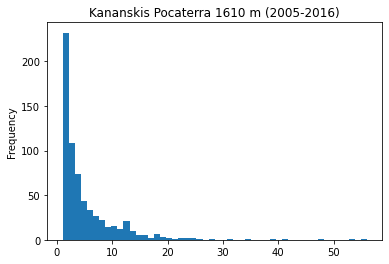

In [79]:
KPP_df.KP_p_mm.plot(kind='hist', bins=50)
plt.title('Kananskis Pocaterra 1610 m (2005-2016)')

gamma: (0.4482289094741757, 0.9999999999999998, 2.031153604460461)
exponential: (1.0, 4.283154670750382)


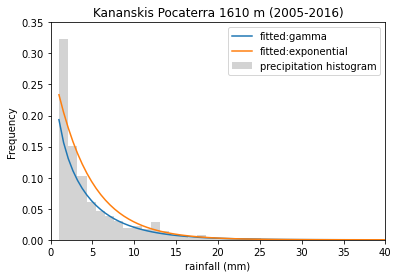

In [80]:
# fit gamma, exp and lognormal distributions
x = np.linspace(1, max(KPP_df.KP_p_mm), 100)
y = KPP_df.KP_p_mm

KPP_df.KP_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')

param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=0.76, scale=5.25) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')

param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')

# param = scipy.stats.lognorm.fit(y)
# print("lognorm:", param)
# pdf_fitted = scipy.stats.lognorm.pdf(x, param[0], param[1], param[2])
# plt.plot(x, pdf_fitted, label='fitted:lognormal')

plt.xlabel('rainfall (mm)')
plt.xlim(0, 40)
plt.ylim(0, 0.35)
plt.legend()
plt.title('Kananskis Pocaterra 1610 m (2005-2016)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_2005-2016_stns\KPprob_1mm_2005-16.png')

### Hay Meadow 1436 m, 916 wet days

Text(0.5, 1.0, 'Hay Meadow 1436 m (2005-2016)')

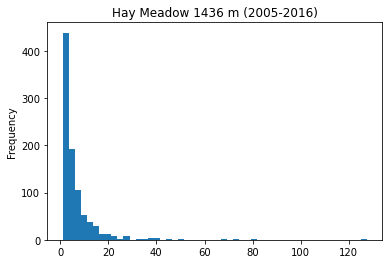

In [81]:
HMP_df.HM_p_mm.plot(kind='hist', bins=50)
plt.title('Hay Meadow 1436 m (2005-2016)')

gamma: (0.07541746617402882, 0.9999999999999998, 2.3497594831162503)
exponential: (1.0, 5.226007751091704)


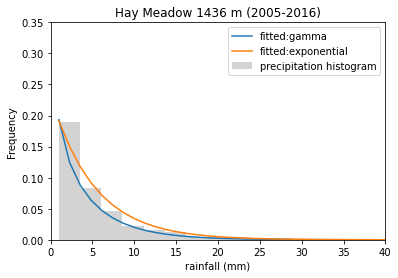

In [82]:
# fit gamma, exp and lognormal distributions
x = np.linspace(1, max(HMP_df.HM_p_mm), 100)
y = HMP_df.HM_p_mm

HMP_df.HM_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')

param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=0.76, scale=5.25) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')

param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')

# param = scipy.stats.lognorm.fit(y)
# print("lognorm:", param)
# pdf_fitted = scipy.stats.lognorm.pdf(x, param[0], param[1], param[2])
# plt.plot(x, pdf_fitted, label='fitted:lognormal')

plt.xlabel('rainfall (mm)')
plt.xlim(0, 40)
plt.ylim(0, 0.35)
plt.legend()
plt.title('Hay Meadow 1436 m (2005-2016)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_2005-2016_stns\HMprob_1mm_2005-16.png')

### Banff CS 1397 m, 980 wet days

Text(0.5, 1.0, 'Banff CS 1397 m (2005-2016)')

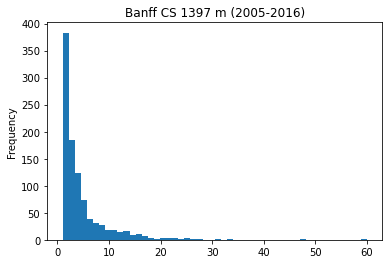

In [83]:
BCSP_df.BCS_p_mm.plot(kind='hist', bins=50)
plt.title('Banff CS 1397 m (2005-2016)')

gamma: (0.3005206020652593, 0.9999999999999999, 2.291681102261725)
exponential: (1.0, 3.546530612244898)


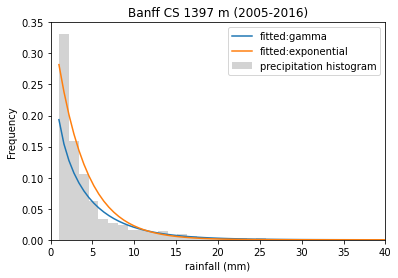

In [84]:
# fit gamma, exp and lognormal distributions
x = np.linspace(1, max(BCSP_df.BCS_p_mm), 100)
y = BCSP_df.BCS_p_mm

BCSP_df.BCS_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')

param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=0.76, scale=5.25) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')

param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')

# param = scipy.stats.lognorm.fit(y)
# print("lognorm:", param)
# pdf_fitted = scipy.stats.lognorm.pdf(x, param[0], param[1], param[2])
# plt.plot(x, pdf_fitted, label='fitted:lognormal')

plt.xlabel('rainfall (mm)')
plt.xlim(0, 40)
plt.ylim(0, 0.35)
plt.legend()
plt.title('Banff CS 1397 m (2005-2016)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_2005-2016_stns\BCSprob_1mm_2005-16.png')

### Kananaskis 1391 m, 1027 wet days

Text(0.5, 1.0, 'Kananaskis 1391 m (2005-2016)')

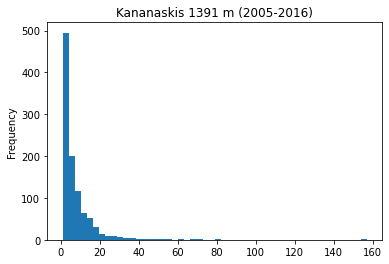

In [85]:
KP_df.K_p_mm.plot(kind='hist', bins=50)
plt.title('Kananaskis 1391 m (2005-2016)')

gamma: (0.14919221761738147, 0.9999999999999998, 1.7935654127740217)
exponential: (1.0, 6.4183057448880225)


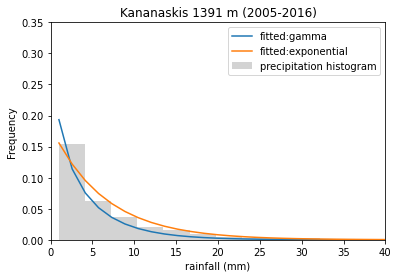

In [86]:
# fit gamma, exp and lognormal distributions
x = np.linspace(1, max(KP_df.K_p_mm), 100)
y = KP_df.K_p_mm

KP_df.K_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')

param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=0.76, scale=5.25) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')

param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')

# param = scipy.stats.lognorm.fit(y)
# print("lognorm:", param)
# pdf_fitted = scipy.stats.lognorm.pdf(x, param[0], param[1], param[2])
# plt.plot(x, pdf_fitted, label='fitted:lognormal')

plt.xlabel('rainfall (mm)')
plt.xlim(0, 40)
plt.ylim(0, 0.35)
plt.legend()
plt.title('Kananaskis 1391 m (2005-2016)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_2005-2016_stns\Kprob_1mm_2005-16.png')

### Bow Valley 1298 m, 947 wet days

Text(0.5, 1.0, 'Bow Valley 1298 m (2005-2016)')

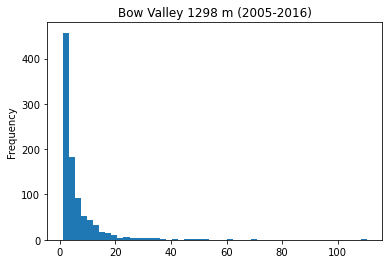

In [87]:
BVP_df.BV_p_mm.plot(kind='hist', bins=50)
plt.title('Bow Valley 1298 m (2005-2016)')

gamma: (0.12581123693159169, 0.9999999999999999, 2.2693642567562806)
exponential: (1.0, 4.973389651531151)


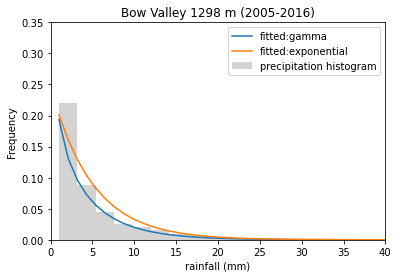

In [88]:
# fit gamma, exp and lognormal distributions
x = np.linspace(1, max(BVP_df.BV_p_mm), 100)
y = BVP_df.BV_p_mm

BVP_df.BV_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')

param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=0.76, scale=5.25) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')

param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')

# param = scipy.stats.lognorm.fit(y)
# print("lognorm:", param)
# pdf_fitted = scipy.stats.lognorm.pdf(x, param[0], param[1], param[2])
# plt.plot(x, pdf_fitted, label='fitted:lognormal')

plt.xlabel('rainfall (mm)')
plt.xlim(0, 40)
plt.ylim(0, 0.35)
plt.legend()
plt.title('Bow Valley 1298 m (2005-2016)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_2005-2016_stns\BVprob_1mm_2005-16.png')

### Wildcat Hills 1268 m, 919 wet days

Text(0.5, 1.0, 'Wildcat Hills 1268 m (2005-2016)')

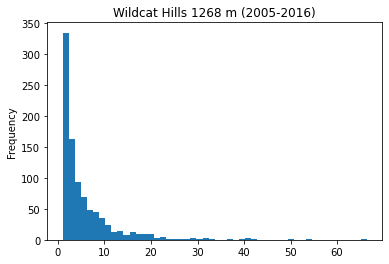

In [89]:
WHP_df.WH_p_mm.plot(kind='hist', bins=50)
plt.title('Wildcat Hills 1268 m (2005-2016)')

gamma: (0.4757108277361052, 0.9999999999999999, 1.791774405256114)
exponential: (1.0, 4.758977149075082)


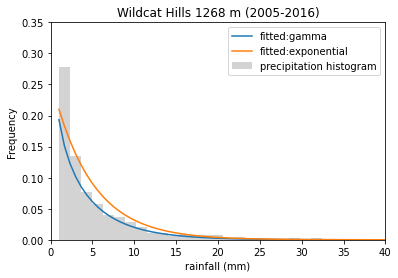

In [90]:
# fit gamma, exp and lognormal distributions
x = np.linspace(1, max(WHP_df.WH_p_mm), 100)
y = WHP_df.WH_p_mm

WHP_df.WH_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')

param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=0.76, scale=5.25) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')

param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')

# param = scipy.stats.lognorm.fit(y)
# print("lognorm:", param)
# pdf_fitted = scipy.stats.lognorm.pdf(x, param[0], param[1], param[2])
# plt.plot(x, pdf_fitted, label='fitted:lognormal')

plt.xlabel('rainfall (mm)')
plt.xlim(0, 40)
plt.ylim(0, 0.35)
plt.legend()
plt.title('Wildcat Hills 1268 m (2005-2016)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_2005-2016_stns\WHprob_1mm_2005-16.png')